# Project Name:Ratings Prediction

Problem Statement:

We have a client who has a website where people write different reviews for technical products. 
Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) 
as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 
3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the 
past and they don’t have a rating. So, we have to build an application which can predict the rating 
by seeing the review.

I have scraped the ratings and reviews of many product from amazon and flipkart website for this project.All stored data and code of scraped data available on this link                                        
link:                                 
https://github.com/KBkoushik/RATINGS-PREDICTION.git

In [1]:
import pandas as pd
#import the data in a dataframe using pondas
df=pd.read_csv("RP_webscrap.CSV")

In [2]:
df

,Rating,Review,Long_Review
0,1,Received a used router,Package was half sealed by Amazon and on the t...
1,1,DON'T Go for It... in case you don't want to r...,This is a followup of my earlier review\n\nCur...
2,1,Don't buy this router,It can't even cover 500squarefeet Area :/\n\nI...
3,1,Cloudtail providing fake reburbished products ...,The product has stopped working only after 6 m...
4,1,Faulty Product,Router was working fine until i started facing...
...,...,...,...
37394,4,Some things are good and some depends on your ...,"Fingerprint reader is decent , batery life is ..."
37395,4,Real camera review,Everything is OK but camera quality is not lik...
37396,4,A power packed smartphone with value for money,Everything is perfect. But the only thing that...
37397,4,"Good but , bad build quality","Camera is nice,Battery back up is good , displ..."


In [3]:
#checking null values
df.isnull().sum()

Rating          0
Review         63
Long_Review    72
dtype: int64

we can see missing values present in the Review column and Long_Review column.our target column Rating is free from missing values                                     

In [499]:
#since we have lot of data, we drop this missing values from the dataframe

In [4]:
df = df.dropna().reset_index(drop=True)

In [5]:
df.head(20)

,Rating,Review,Long_Review
0,1,Received a used router,Package was half sealed by Amazon and on the t...
1,1,DON'T Go for It... in case you don't want to r...,This is a followup of my earlier review\n\nCur...
2,1,Don't buy this router,It can't even cover 500squarefeet Area :/\n\nI...
3,1,Cloudtail providing fake reburbished products ...,The product has stopped working only after 6 m...
4,1,Faulty Product,Router was working fine until i started facing...
5,1,Mostly router decreases speed from 50Mbps to 5...,I am disappointed with this router on basis of...
6,1,Disconnect from Internet connection automatically,After 1 day of purchase router TL-WR940N start...
7,1,Worst Experience with TPLink Router,I purchased this TPLink Wifi Router device on ...
8,1,Don't buy faulty,Router was working fine until i started facing...
9,1,Defects occur,Less than 1 year and the power supply failed a...


In [6]:
#vhecking null values
df.isnull().sum()

Rating         0
Review         0
Long_Review    0
dtype: int64

now our data is free from missing values

In [7]:
#checking shape of the Dataframe
df.shape

(37324, 3)

our dataframe has 37324 rows and 3 columns.It means we have 37324 product's 3 type of data for rating prediction.

# Exploratory Data Analysis (EDA)

In [8]:
#import libraries for ploting and advanced visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [9]:
#checking info(colum name , non-null count , data type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37324 entries, 0 to 37323
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rating       37324 non-null  int64 
 1   Review       37324 non-null  object
 2   Long_Review  37324 non-null  object
dtypes: int64(1), object(2)
memory usage: 874.9+ KB


two type data present in our dataframe                                    
-int64                                                            
-object                           

In [10]:
df.dtypes.index

Index(['Rating', 'Review', 'Long_Review'], dtype='object')

In [11]:
#Making a list of all numerical columns
numerical_columns=[]
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

['Rating']
[0]


In [12]:
len(numerical_columns)

1

we have 1 numericals column in the data

In [13]:
#Making a list of all categorical columns
categorical_columns=[]
index_c=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
        index_c.append(m)
    m=m+1
print(categorical_columns)
print(index_c)

['Review', 'Long_Review']
[1, 2]


In [14]:
len(categorical_columns)

2

we have 2 categorical columns in the data

In [15]:
#Converting into lower case
df['Review']=df['Review'].str.lower()
df['Long_Review']=df['Long_Review'].str.lower()

In [16]:
#adding the length of the review
df['Review_len']=df.Review.str.len()
df['Long_Review_len']=df.Long_Review.str.len()
df.head()

,Rating,Review,Long_Review,Review_len,Long_Review_len
0,1,received a used router,package was half sealed by amazon and on the t...,22,383
1,1,don't go for it... in case you don't want to r...,this is a followup of my earlier review\n\ncur...,60,1795
2,1,don't buy this router,it can't even cover 500squarefeet area :/\n\ni...,21,244
3,1,cloudtail providing fake reburbished products ...,the product has stopped working only after 6 m...,72,308
4,1,faulty product,router was working fine until i started facing...,14,589


In [17]:
# Replace email addresses with 'email'
df['Long_Review']=df['Long_Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['Long_Review']=df['Long_Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['Long_Review']=df['Long_Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

In [18]:
#Removing the pucntuations
df['Long_Review']=df['Long_Review'].str.replace(r'[^\w\d\s]', ' ')
df['Review']=df['Review'].str.replace(r'[^\w\d\s]', ' ')
# Replace whitespace between terms with a single space
df['Long_Review']=df['Long_Review'].str.replace(r'\s+', ' ')
df['Review']=df['Review'].str.replace(r'\s+', ' ')
# Remove leading and trailing whitespace
df['Long_Review']=df['Long_Review'].str.replace(r'^\s+|\s+?$', '')
df['Review']=df['Review'].str.replace(r'^\s+|\s+?$', '')

In [19]:
#removing noise and repetation of data 
stoplist=['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your','yours','yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself','it',"it's",'its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that',"that'll",'these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','only','own','same','so','than','too','very','s','t','can','will','just','should',"should've",'now','d','ll','m','o','re','ve','y']


In [20]:
#add some unnecessary words which are present in reviews
stoplist=stoplist+['printer','cannon','tplink','port','cartridges','customer','smartphone','home','ok','dslr','due','laptop','product','flipkart','u', 'ü', 'ur', '4', '2', 'im', 'doin', 'ure','since','also','hp','windows','day','like','k','upto','later','today','hour','hours','kg','gb','ram','ssd','products','app','watch','phone','online','class','game','student','prodect','printer','amazon','quality','router','use','signal','got','hp','range','printing','custoemr','service','ink','purchase','phone','star','stars','battery','camera','voice','money','headphone','cannon','1500d','received','router','package','wifi','price','cartridge','card','job','print','working','okay','photo','cost','option','modem','paper','bass','tp','link','installation','time','headphone','page','please','take','much','ear','cd','m31','brand','review','charger','go','cloudtail','providing']


In [21]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = stoplist

df['Long_Review'] = df['Long_Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
df['Review'] = df['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [22]:
df['Review_len']=df.Review.str.len()
df['Long_Review_len']=df.Long_Review.str.len()
df.head()

,Rating,Review,Long_Review,Review_len,Long_Review_len
0,1,used,half sealed box tried set via lan username pas...,4,200
1,1,don case don want regret,followup earlier currently immensely regrettin...,24,1057
2,1,don buy,even cover 500squarefeet area not good lot pac...,7,160
3,1,fake reburbished tag genuinity,stopped 6 months taken centre said number box ...,30,125
4,1,faulty,fine started facing problems soon second thoug...,6,283


In [25]:
# writing function for the entire dataset
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters

from nltk.stem import SnowballStemmer, WordNetLemmatizer
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [26]:
#converting Rating from String into int
import numpy as np
df['Rating'] = df['Rating'].astype(np.int64)

# Word Cloud of 1 Rating

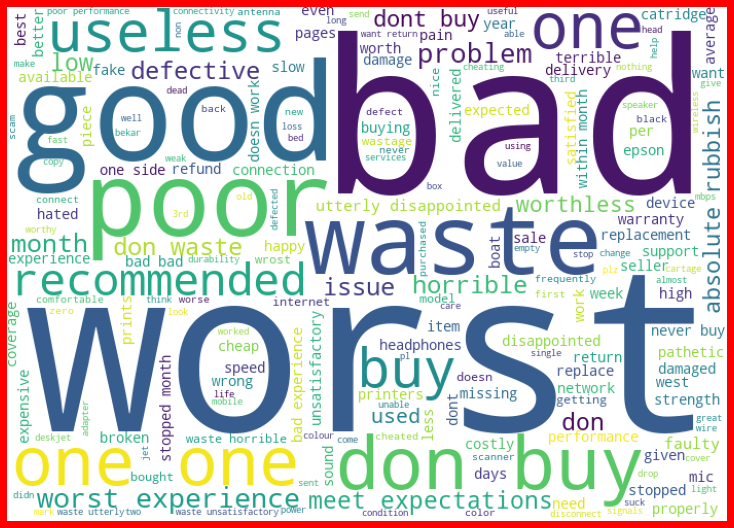

In [30]:
from wordcloud import WordCloud
#Getting sense of words in Rating 1
one = df['Review'][df['Rating']==1]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Word Cloud of 2 Rating

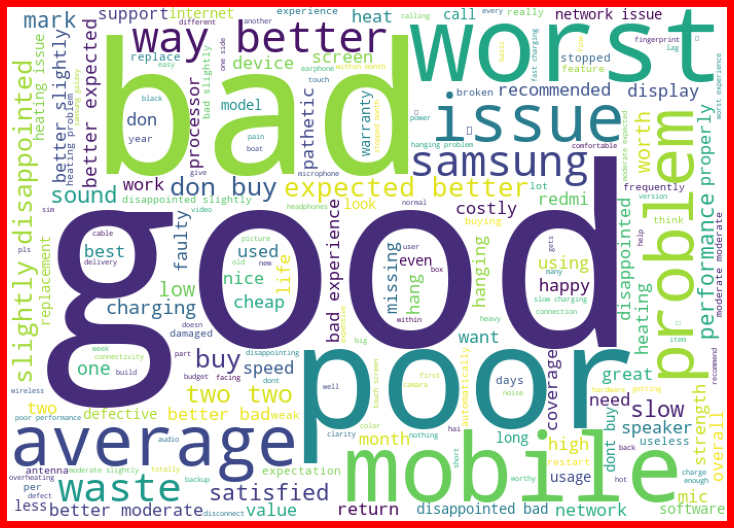

In [31]:
five = df['Review'][df['Rating']==2]

five_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(five))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(five_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Word Cloud of 3 Rating

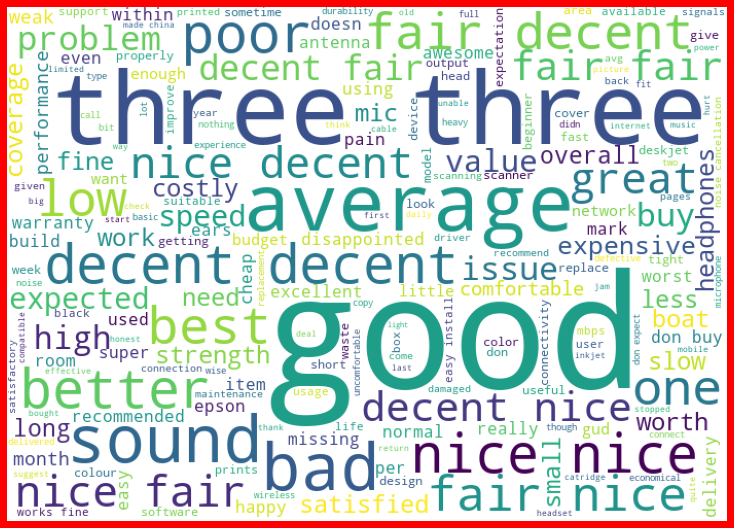

In [33]:
five = df['Review'][df['Rating']==3]

five_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(five))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(five_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Word Cloud of 4 Rating

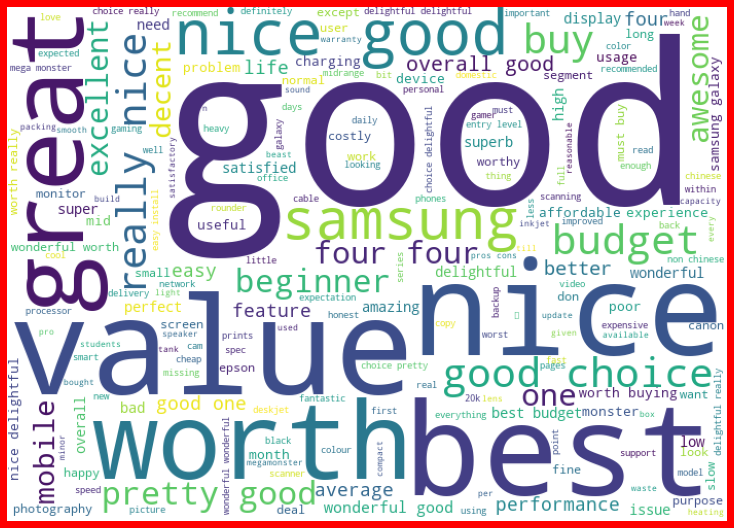

In [34]:
five = df['Review'][df['Rating']==4]

five_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(five))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(five_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Word Cloud of 5 Rating

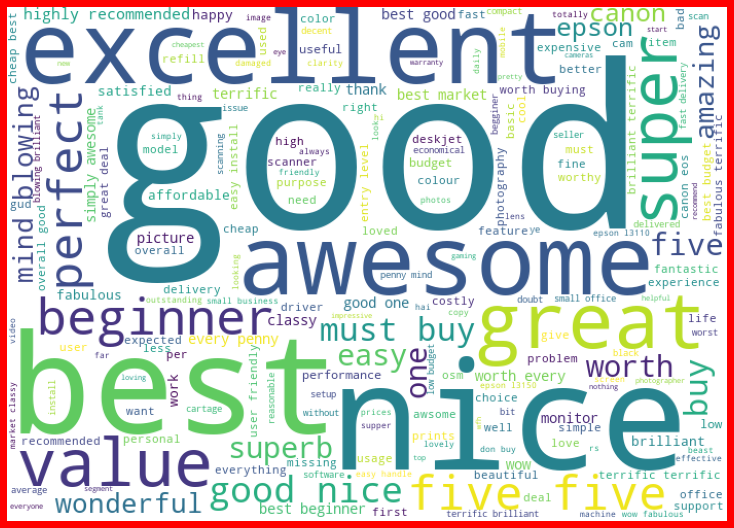

In [35]:
five = df['Review'][df['Rating']==5]

five_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(five))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(five_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Univariate Analysis:

<AxesSubplot:xlabel='Review_len', ylabel='Density'>

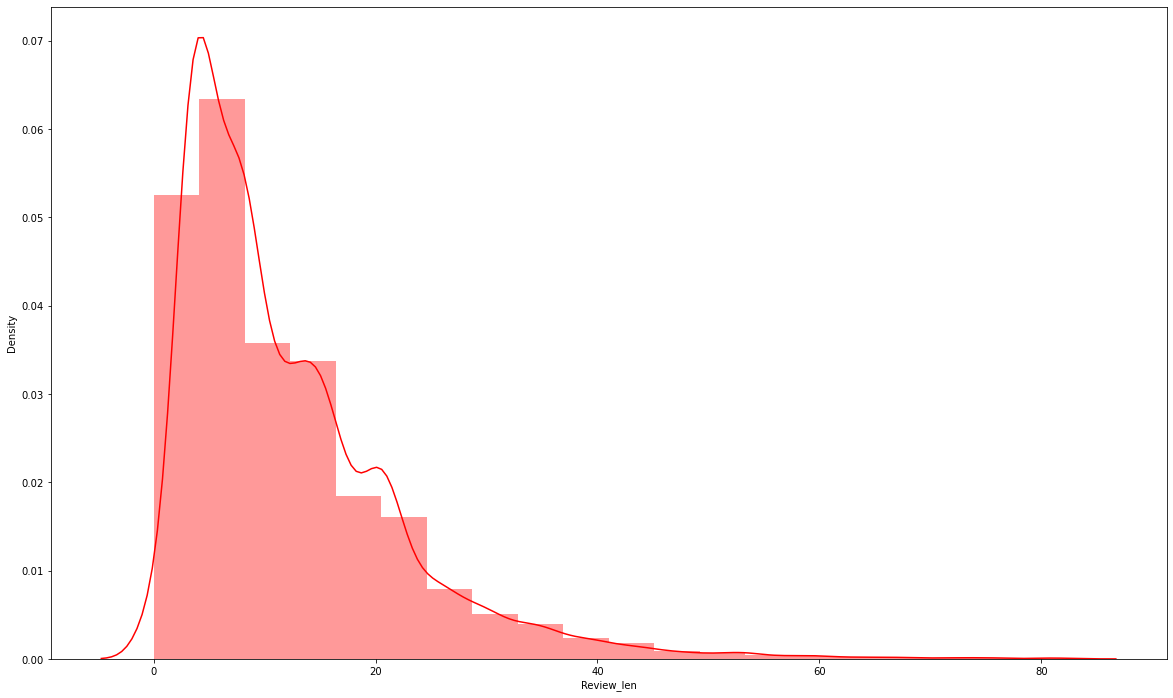

In [39]:
plt.figure(figsize=(20,12))
sns.distplot(df[df['Rating']==1]['Review_len'],bins=20,label='for rating 1',color='r')

<AxesSubplot:xlabel='Review_len', ylabel='Density'>

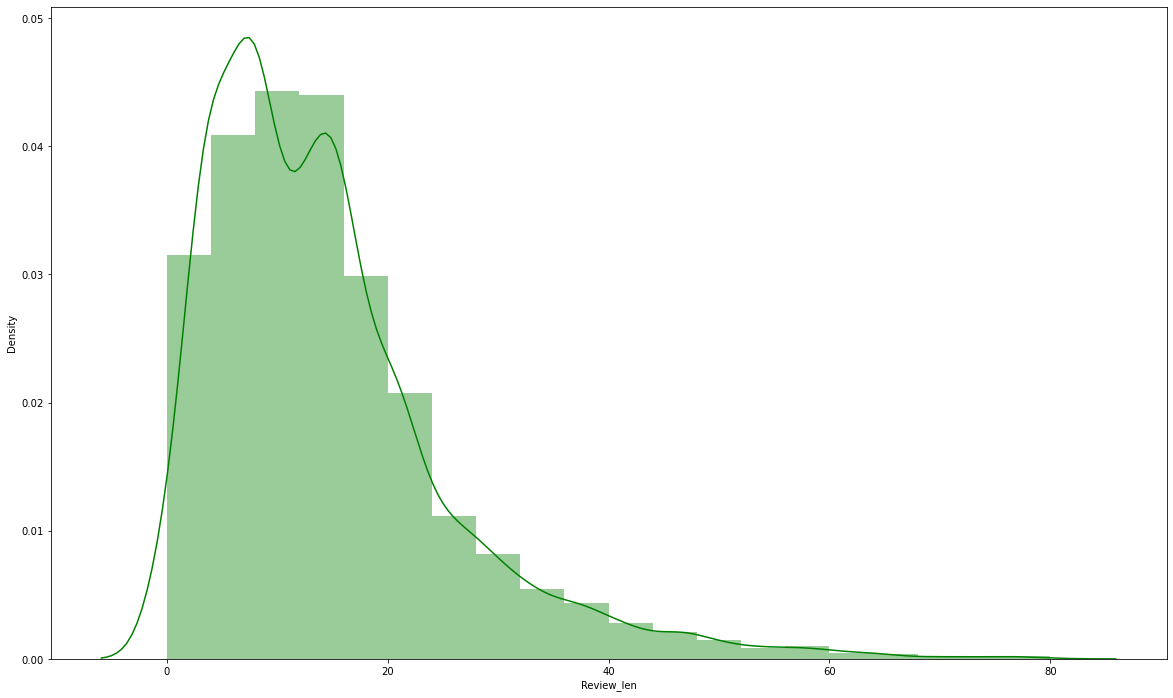

In [41]:
plt.figure(figsize=(20,12))
sns.distplot(df[df['Rating']==2]['Review_len'],bins=20,label='for rating 1',color='g')

<AxesSubplot:xlabel='Review_len', ylabel='Density'>

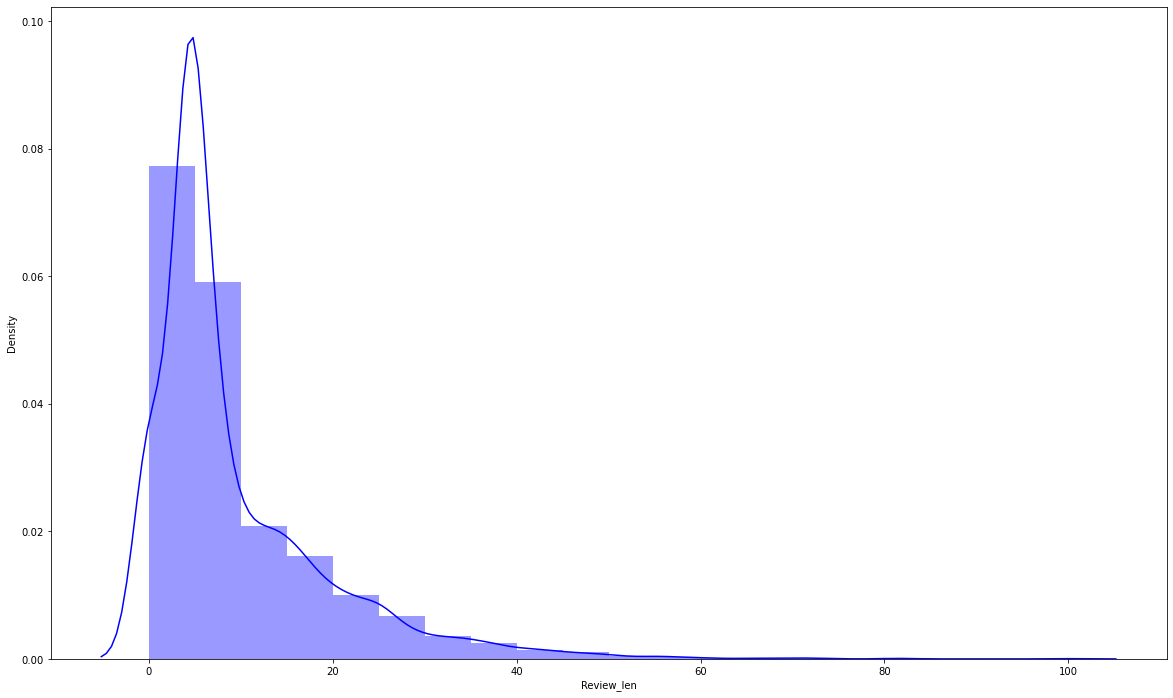

In [42]:
plt.figure(figsize=(20,12))
sns.distplot(df[df['Rating']==3]['Review_len'],bins=20,label='for rating 1',color='b')

<AxesSubplot:xlabel='Review_len', ylabel='Density'>

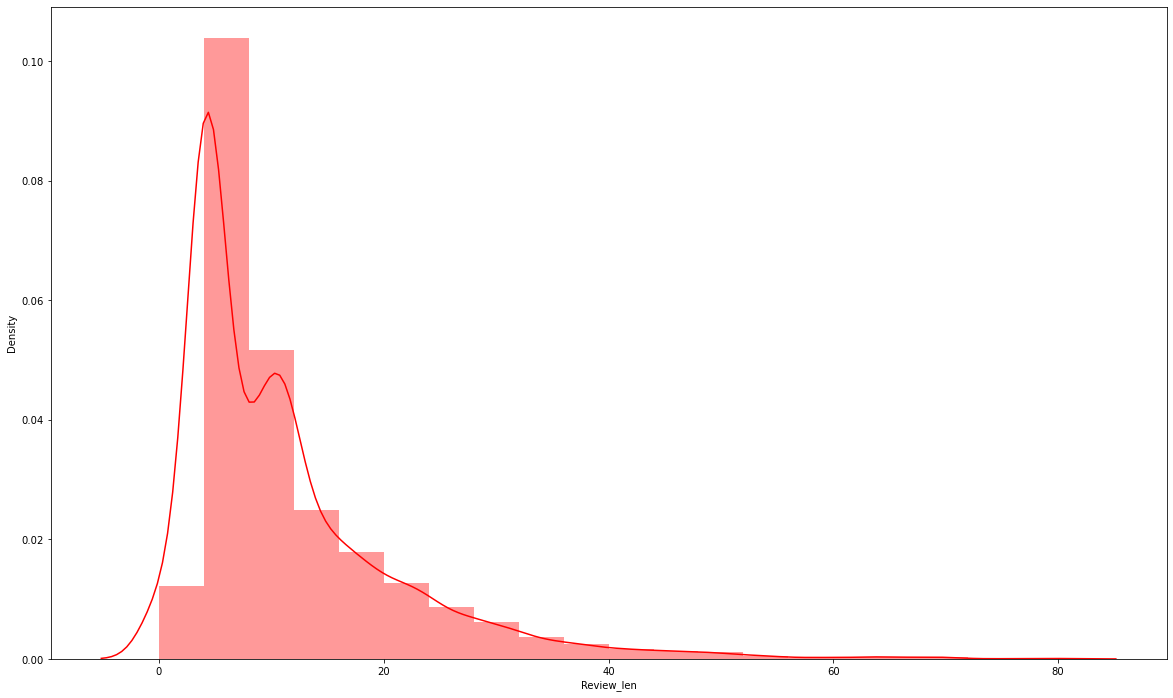

In [44]:
plt.figure(figsize=(20,12))
sns.distplot(df[df['Rating']==4]['Review_len'],bins=20,label='for rating 1',color='r')

<AxesSubplot:xlabel='Review_len', ylabel='Density'>

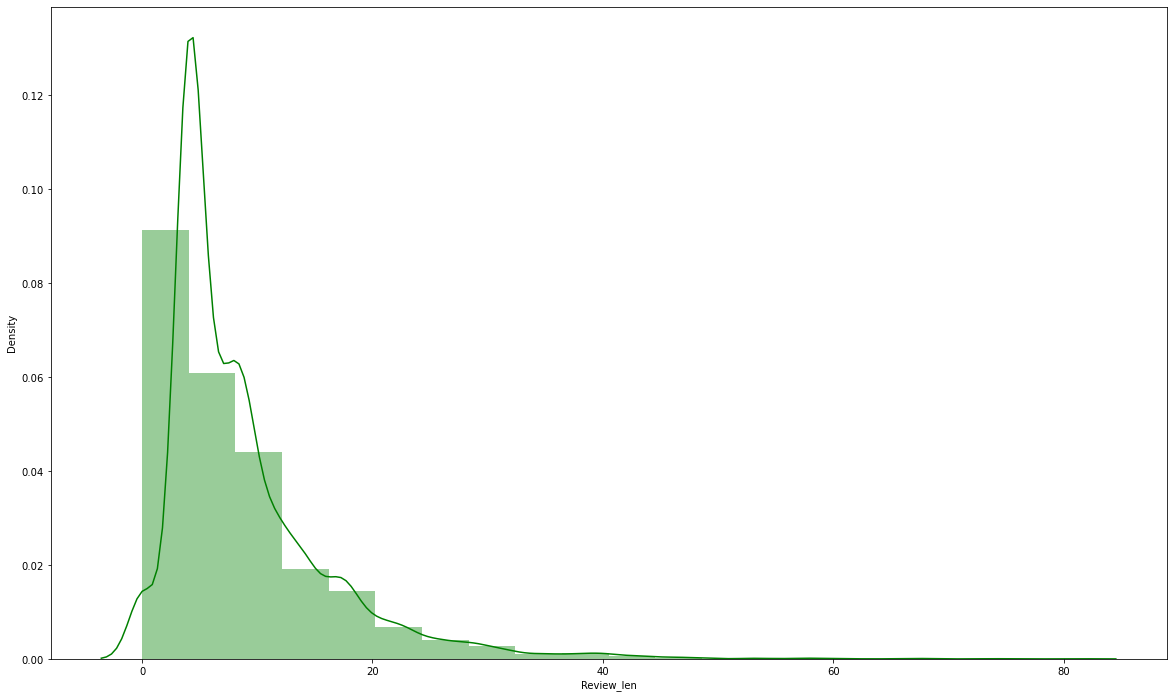

In [45]:
plt.figure(figsize=(20,12))
sns.distplot(df[df['Rating']==5]['Review_len'],bins=20,label='for rating 1',color='g')

In [48]:
#Removing some noise from the data
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
ps = PorterStemmer()
wordnet=WordNetLemmatizer()
punc=string.punctuation#punctuations
corpus = []#remove noise and punctuation
for i in range(0,37324):
    reviews = re.sub("[^a-zA-z\s']", ' ', df['Review'][i])
    reviews = reviews.lower()
    reviews = reviews.split() 
    reviews = [wordnet.lemmatize(word) for word in reviews if word not in stoplist if word not in punc]
    reviews = ' '.join(reviews)
    corpus.append(reviews)
df['Review']=corpus
corpus = []#remove noise and punctuation
for i in range(0,37324):
    reviews = re.sub("[^a-zA-z\s']", ' ', df['Long_Review'][i])
    reviews = reviews.lower()
    reviews = reviews.split() 
    reviews = [wordnet.lemmatize(word) for word in reviews if word not in stoplist if word not in punc]
    reviews = ' '.join(reviews)
    corpus.append(reviews)
df['Long_Review']=corpus

In [50]:
df['Review_len']=df.Review.str.len()
df['Long_Review_len']=df.Long_Review.str.len()
df.head()

,Rating,Review,Long_Review,Review_len,Long_Review_len
0,1,used,half sealed box tried set via lan username pas...,4,200
1,1,don case don want regret,followup earlier currently immensely regrettin...,24,1015
2,1,don buy,even cover squarefeet area not good lot packet...,7,152
3,1,fake reburbished tag genuinity,stopped month taken centre said number box scr...,30,120
4,1,faulty,fine started facing problem soon second though...,6,278


In [51]:
# 1. Convert text into vectors using TF-IDF
# 2. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['Long_Review'])

x = features
y = df['Rating']

In [52]:
print("shape of x is :",x.shape)
print("shape of y is :",y.shape)

shape of x is : (37324, 13471)
shape of y is : (37324,)


# Oversampling:

In [53]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [54]:
x,y=smt.fit_resample(x,y)

In [55]:
y.value_counts()

1    9884
2    9884
3    9884
4    9884
5    9884
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

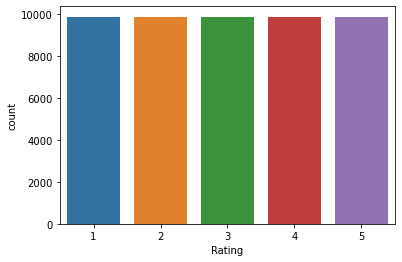

In [56]:
sns.countplot(y)

now class of the target column is balanced.

# Model Building:

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [58]:
x.shape

(49420, 13471)

In [60]:
#finding best random state
maxAccu=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is :",maxAccu,"on random state  ",maxRS)

Best accuracy score is : 0.5820180763523539 on random state   14


we get best random state value.Now it will be used for train test split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxRS)

In [62]:
#chacking shape of all variables which are geting from train test split function
print("x_train shape =",x_train.shape)
print("x_test shape =",x_test.shape)
print("y_train shape =",y_train.shape)
print("y_test shape =",y_test.shape)

x_train shape = (34594, 13471)
x_test shape = (14826, 13471)
y_train shape = (34594,)
y_test shape = (14826,)


all shapes are right for fit to the model.

In [66]:
lg=LogisticRegression()
#gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
grb=GradientBoostingClassifier()
adb=AdaBoostClassifier()

#creat a list of all above model
model=[lg,svc,dtc,knn,rfc,grb,adb]

In [67]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*'*125)
    print('_'*125)
    print("\n")

Accuracy score of  LogisticRegression() is
0.5820180763523539
[[2020  373  438   53   79]
 [ 630 1548  546  142   75]
 [ 356  282 1671  144  538]
 [ 104  230  468 1121 1027]
 [  73   70  266  303 2269]]
              precision    recall  f1-score   support

           1       0.63      0.68      0.66      2963
           2       0.62      0.53      0.57      2941
           3       0.49      0.56      0.52      2991
           4       0.64      0.38      0.48      2950
           5       0.57      0.76      0.65      2981

    accuracy                           0.58     14826
   macro avg       0.59      0.58      0.58     14826
weighted avg       0.59      0.58      0.58     14826

*****************************************************************************************************************************
_____________________________________________________________________________________________________________________________


Accuracy score of  SVC() is
0.6546607311479833
[[2422 

we get best accuracy score 90% from RandomForestClassifier

# Checking Cross Val Score:

In [68]:
from sklearn.model_selection import cross_val_score
for i in range(3,6):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print("\n")
    print('*'*125)
    print('*'*125)
    print("\n")

For CV = 3
cross validation score of LogisticRegression() is = 0.5169381838426643
cross validation score of SVC() is = 0.5820131248403769
cross validation score of DecisionTreeClassifier() is = 0.5048979718567953
cross validation score of KNeighborsClassifier() is = 0.42146968485222347
cross validation score of RandomForestClassifier() is = 0.6167358452946928
cross validation score of GradientBoostingClassifier() is = 0.4808797088257577
cross validation score of AdaBoostClassifier() is = 0.43415749476809323


*****************************************************************************************************************************
*****************************************************************************************************************************


For CV = 4
cross validation score of LogisticRegression() is = 0.5184135977337111
cross validation score of SVC() is = 0.6033791987049777
cross validation score of DecisionTreeClassifier() is = 0.5306960744637799
cross validation s

After checking cross val score we can see the difference  between accuracy score and cross val score is less and cross val score is maximum compare to other model at CV=5. So, we choose RandomForest classifier for parameter tuning.

# Parameter Tuning for RandomForestClassifier:

In [69]:
#creating parameter list to pass in GreadSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
gcv1=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
gcv1.fit(x_train,y_train)
gcv1.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}

In [75]:
gcv1.best_score_

0.7802018441536833


after parameter tuning for RandomForestClassifier, we get best accuracy score from it.so we creat a final model with this parameter.

# Creating Final Model:

In [72]:
final_model=gcv1.best_estimator_

In [79]:
final_model.fit(x_train,y_train)
predm1=final_model.predict(x_test)
predm2=final_model.predict(x_train)
print('Test Accuracy score of final model =',accuracy_score(y_test,predm1))
print('Train Accuracy score of final model =',accuracy_score(y_train,predm2))
print(confusion_matrix(y_test,predm1))

Test Accuracy score of final model = 0.7219560232024821
Train Accuracy score of final model = 0.7319560232024821
[[2184  142  264   26  347]
 [ 944  919  394  361  323]
 [ 667  136  894  197 1097]
 [ 178   87  197 1045 1443]
 [ 128   27   79  202 2545]]


<AxesSubplot:>

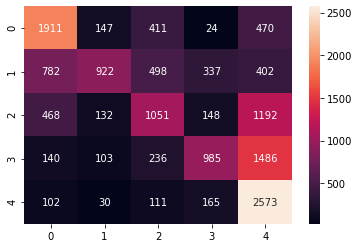

In [76]:
#Showing confusion matrix using Heatmap 
confusion_matrix(y_test,predm1)
sns.heatmap(confusion_matrix(y_test,predm1),annot=True, fmt='d')

In [80]:
MLdf=pd.DataFrame([final_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T
MLdf

,Predicted,Original
0,1,1
1,4,4
2,3,3
3,5,5
4,2,2
...,...,...
14821,4,4
14822,3,3
14823,5,3
14824,5,4


# Saving Model:

In [81]:
#Save the final model                                                                      
import joblib                                                                                                     
joblib.dump(final_model,'Rating Prediction Model.pkl')